## Introduction to Quarto Report

For a demonstration of the capability of [Quarto](https://quarto.org/).

### Setup

In [1]:
#| echo: true

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
#| echo: false

# Add matplotlib inline as to persist the white face color of every figures in the notebook
%matplotlib inline
plt.rcParams["figure.facecolor"] = "white"

### Data Preprocessing

@tbl-iris presents data on Iris dataset. All length and width are in **centimeter (cm)**.

In [3]:
#| code-fold: true
#| tbl-cap: Iris dataset
#| label: tbl-iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

target = pd.Series(iris.target)
df["target"] = target.apply(lambda x, y: y[x], args=(iris.target_names,))

column_names = {c: c.replace(" (cm)", "") for c in df.columns}
df = df.rename(columns=column_names)

df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Exploratory Data Analysis (EDA)

We will start our EDA process with the distribution of `sepal length` of each `target`.

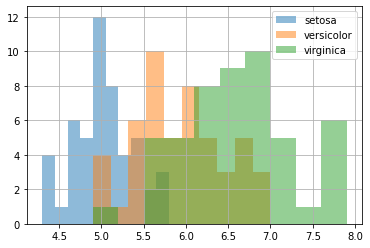

In [4]:
#| code-fold: show
#| fig-cap: Distribution of sepal lengths
#| label: fig-sepal-length-histogram
#| fig-cap-location: bottom
#| fig-align: center

df.groupby("target")["sepal length"].hist(alpha=0.5, legend=True)
plt.show()

We've created @fig-sepal-length-histogram 🎊. It seems like there is some pattern that can be used to identify whether the given data is *setosa*, *versicolor* or  *virginica*.

In order to find a generalized model, we need to incorporate multiple aspects of data as possible. Therefore, we have to inspect other features as well. `petal length` seems to be a good start but does it give us new information? - We can explore this by displaying the relationship between `sepal length` and `petal length`.

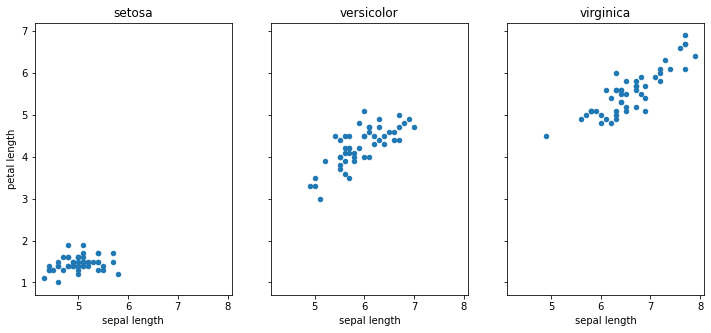

In [5]:
#| code-fold: show
#| fig-cap: Correlation between sepal length and petal length
#| label: fig-sepal-length-petal-length-correlation
#| fig-cap-location: bottom
#| fig-align: center

grouped_df = df.groupby("target")
_, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, sharex=True)

for i, (n, g) in enumerate(grouped_df):
    g.plot(x="sepal length", y="petal length", kind="scatter", ax=axes[i], title=n)

As shown in @fig-sepal-length-petal-length-correlation, there is a linear relationship in *versicolor* and *virginica*. Though, this is not much clear for *setosa*. In addition, in each `target` group, their `petal length` and `sepal length` are in different range especially for `petal length`. *virginica* is likely to be the biggest in length and *setosa* is the smallest one.

What we can conclue that `petal length` looks like another important feature for modelling. However, when we use both `sepal length` and `petal length`, we should be careful of [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity).

What about on the `sepal width` and `petal width`?

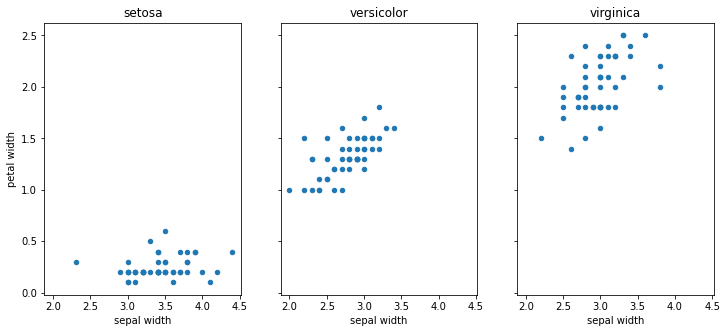

In [6]:
#| code-fold: true
#| fig-cap: Correlation between sepal width and petal width
#| label: fig-sepal-width-petal-width-correlation
#| fig-cap-location: bottom
#| fig-align: center

_, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, sharex=True)

for i, (n, g) in enumerate(grouped_df):
    g.plot(x="sepal width", y="petal width", kind="scatter", ax=axes[i], title=n)

You will see that from @fig-sepal-width-petal-width-correlation, it has the similar behaviors between `sepal width` and `petal width` like in @fig-sepal-length-petal-length-correlation. Therefore, they are the other interesting features to the model.